# Data Preprocessing

## Load data

Import libraries

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Load dataset into pandas dataframe

In [3]:
df = pd.read_csv('/Users/markmans/code/diego-mogollon/lateguru/raw_data/Dataset_B_FORWW_Kaggle_All_Airports.csv',compression='zip')

## Data check

In [4]:
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1020.32,1020.1,16093.40,0.0,24.97,0.0,0.0
1,2021-01-02 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,2.0,NaN,NaN,...,NaN,54.0,54.0,1025.74,1025.5,16093.40,0.0,24.97,0.0,0.0
2,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,52.0,52.0,1024.38,1015.2,4828.02,4.6,24.97,0.0,0.0
3,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,53.0,53.1,1024.38,1024.1,6437.36,4.6,24.97,0.0,0.0
4,2021-01-04 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.1,1023.03,1015.2,6437.36,4.6,24.97,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144514 entries, 0 to 15144513
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Origin                  object 
 2   Dest                    object 
 3   Carrier                 object 
 4   Cancelled               bool   
 5   CancellationReason      object 
 6   Delayed                 bool   
 7   DepDelayMinutes         float64
 8   CarrierDelay            float64
 9   WeatherDelay            float64
 10  NASDelay                float64
 11  SecurityDelay           float64
 12  LateAircraftDelay       float64
 13  Temperature             float64
 14  Feels_Like_Temperature  float64
 15  Altimeter_Pressure      float64
 16  Sea_Level_Pressure      float64
 17  Visibility              float64
 18  Wind_Speed              float64
 19  Wind_Gust               float64
 20  Precipitation           float64
 21  Ice_Accretion_3hr       float

In [6]:
df.describe()

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,1.481562e+07,3.274328e+06,3.274328e+06,3.274328e+06,3.274328e+06,3.274328e+06,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07
mean,1.608864e+01,2.551989e+01,5.424442e+00,1.244986e+01,1.523775e-01,2.440234e+01,6.317238e+01,6.218925e+01,1.016327e+03,1.016158e+03,1.452299e+04,9.068776e+00,2.608714e+01,1.739791e-01,1.685416e-04
std,5.152882e+01,6.765369e+01,3.479500e+01,2.882782e+01,3.611932e+00,5.611603e+01,1.805368e+01,2.100936e+01,6.502375e+00,6.172797e+00,3.031896e+04,5.421863e+00,3.098764e+00,1.295235e+00,2.063771e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,-4.086000e+01,1.164900e+02,9.078000e+02,0.000000e+00,0.000000e+00,9.210000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01,5.110000e+01,1.012530e+03,1.012800e+03,1.609340e+04,5.750000e+00,2.474000e+01,0.000000e+00,0.000000e+00
50%,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.500000e+01,6.490000e+01,1.016260e+03,1.016200e+03,1.609340e+04,8.060000e+00,2.624000e+01,0.000000e+00,0.000000e+00
75%,1.100000e+01,2.600000e+01,0.000000e+00,1.700000e+01,0.000000e+00,2.700000e+01,7.600000e+01,7.600000e+01,1.020320e+03,1.019300e+03,1.609340e+04,1.266000e+01,2.762000e+01,0.000000e+00,0.000000e+00
max,3.695000e+03,3.221000e+03,1.805000e+03,1.409000e+03,1.183000e+03,3.581000e+03,1.190000e+02,1.186000e+02,1.042330e+03,1.068400e+03,3.380419e+07,2.819400e+02,9.667000e+01,8.230000e+01,1.194000e+01


In [7]:
df.columns

Index(['Time', 'Origin', 'Dest', 'Carrier', 'Cancelled', 'CancellationReason',
       'Delayed', 'DepDelayMinutes', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr'],
      dtype='object')

In [8]:
df.isnull().sum()

Time                             0
Origin                           0
Dest                             0
Carrier                          0
Cancelled                        0
CancellationReason        14804803
Delayed                          0
DepDelayMinutes             328891
CarrierDelay              11870186
WeatherDelay              11870186
NASDelay                  11870186
SecurityDelay             11870186
LateAircraftDelay         11870186
Temperature                      0
Feels_Like_Temperature           0
Altimeter_Pressure               0
Sea_Level_Pressure               0
Visibility                       0
Wind_Speed                       0
Wind_Gust                        0
Precipitation                    0
Ice_Accretion_3hr                0
dtype: int64

## Data cleaning

### Duplicates

In [9]:
len(df)

15144514

In [10]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
15144509    False
15144510    False
15144511    False
15144512    False
15144513    False
Length: 15144514, dtype: bool

In [11]:
df.duplicated().sum()

np.int64(705215)

In [12]:
dup_rows = df[df.duplicated()]

In [13]:
print(dup_rows)

                         Time Origin Dest                 Carrier  Cancelled  \
18        2021-01-08 09:00:00    LAX  JFK  American Airlines Inc.      False   
35        2021-01-22 09:00:00    LAX  JFK  American Airlines Inc.      False   
101       2021-01-08 09:00:00    LAX  HNL  American Airlines Inc.      False   
118       2021-01-22 09:00:00    LAX  HNL  American Airlines Inc.      False   
224       2021-01-22 09:00:00    LAX  KOA  American Airlines Inc.      False   
...                       ...    ...  ...                     ...        ...   
15137677  2023-09-15 12:00:00    MSP  PHX    Delta Air Lines Inc.      False   
15138125  2023-09-15 12:00:00    MSP  BNA    Delta Air Lines Inc.      False   
15142825  2023-09-15 12:00:00    MSP  FSD   SkyWest Airlines Inc.      False   
15142893  2023-09-15 12:00:00    MSP  RST   SkyWest Airlines Inc.      False   
15144361  2023-09-15 12:00:00    MSP  DEN  Southwest Airlines Co.      False   

         CancellationReason  Delayed  D

**Decision:** I will not drop these "duplicate" rows. **Rationale:** After checking the data in dup_rows it seems that these are not really duplicates and the rows should remain to be considered for the model training. *Will consider making separate dataframe with duplicates dropped.*

### Missing data

In [14]:
df.isnull().sum().sort_values(ascending=False)

CancellationReason        14804803
SecurityDelay             11870186
CarrierDelay              11870186
WeatherDelay              11870186
NASDelay                  11870186
LateAircraftDelay         11870186
DepDelayMinutes             328891
Feels_Like_Temperature           0
Precipitation                    0
Wind_Gust                        0
Wind_Speed                       0
Visibility                       0
Sea_Level_Pressure               0
Altimeter_Pressure               0
Time                             0
Temperature                      0
Origin                           0
Delayed                          0
Cancelled                        0
Carrier                          0
Dest                             0
Ice_Accretion_3hr                0
dtype: int64

In [15]:
df.isnull().sum().sort_values(ascending=False) / len(df)

CancellationReason        0.977569
SecurityDelay             0.783794
CarrierDelay              0.783794
WeatherDelay              0.783794
NASDelay                  0.783794
LateAircraftDelay         0.783794
DepDelayMinutes           0.021717
Feels_Like_Temperature    0.000000
Precipitation             0.000000
Wind_Gust                 0.000000
Wind_Speed                0.000000
Visibility                0.000000
Sea_Level_Pressure        0.000000
Altimeter_Pressure        0.000000
Time                      0.000000
Temperature               0.000000
Origin                    0.000000
Delayed                   0.000000
Cancelled                 0.000000
Carrier                   0.000000
Dest                      0.000000
Ice_Accretion_3hr         0.000000
dtype: float64

#### CancellationReason

Check .unique() values in column

In [16]:
df['CancellationReason'].unique()

array([nan, 'Weather', 'Carrier', 'Security', 'National Air System'],
      dtype=object)

**Decision:** Replace NaN values. **Rationale:** Null values represent non-cancellation of flights which should be included in data for model training.

In [17]:
df.CancellationReason = df.CancellationReason.replace(np.nan, "NotCancelled")

*QA Check*

In [18]:
df['CancellationReason'].unique()

array(['NotCancelled', 'Weather', 'Carrier', 'Security',
       'National Air System'], dtype=object)

#### SecurityDelay

In [19]:
df['SecurityDelay'].unique()

array([      nan, 0.000e+00, 6.500e+01, 2.200e+01, 8.200e+01, 2.800e+01,
       4.800e+01, 1.500e+01, 3.300e+01, 6.400e+01, 1.460e+02, 7.500e+01,
       1.700e+01, 8.000e+00, 1.000e+02, 1.010e+02, 2.000e+01, 1.800e+01,
       7.000e+00, 9.000e+00, 1.900e+01, 1.600e+01, 6.000e+00, 3.800e+01,
       1.360e+02, 4.400e+01, 1.000e+00, 1.000e+01, 4.900e+01, 5.300e+01,
       1.400e+01, 7.100e+01, 3.000e+01, 3.700e+01, 3.400e+01, 9.800e+01,
       5.100e+01, 5.800e+01, 2.600e+01, 3.600e+01, 2.900e+01, 2.400e+01,
       2.700e+01, 1.100e+01, 3.500e+01, 4.000e+01, 4.700e+01, 1.160e+02,
       1.200e+01, 3.100e+01, 5.600e+01, 7.900e+01, 2.500e+01, 8.400e+01,
       3.000e+00, 2.000e+00, 3.200e+01, 6.100e+01, 2.200e+02, 4.500e+01,
       3.900e+01, 4.000e+00, 1.300e+01, 8.500e+01, 9.000e+01, 4.300e+01,
       5.000e+00, 2.300e+01, 6.000e+01, 4.100e+01, 4.600e+01, 7.200e+01,
       1.080e+02, 5.000e+01, 5.500e+01, 6.300e+01, 4.200e+01, 5.700e+01,
       7.000e+01, 7.400e+01, 6.600e+01, 5.400e+01, 

In [20]:
df.SecurityDelay = df.SecurityDelay.replace(np.nan, 0)

In [21]:
df['SecurityDelay'].unique()

array([0.000e+00, 6.500e+01, 2.200e+01, 8.200e+01, 2.800e+01, 4.800e+01,
       1.500e+01, 3.300e+01, 6.400e+01, 1.460e+02, 7.500e+01, 1.700e+01,
       8.000e+00, 1.000e+02, 1.010e+02, 2.000e+01, 1.800e+01, 7.000e+00,
       9.000e+00, 1.900e+01, 1.600e+01, 6.000e+00, 3.800e+01, 1.360e+02,
       4.400e+01, 1.000e+00, 1.000e+01, 4.900e+01, 5.300e+01, 1.400e+01,
       7.100e+01, 3.000e+01, 3.700e+01, 3.400e+01, 9.800e+01, 5.100e+01,
       5.800e+01, 2.600e+01, 3.600e+01, 2.900e+01, 2.400e+01, 2.700e+01,
       1.100e+01, 3.500e+01, 4.000e+01, 4.700e+01, 1.160e+02, 1.200e+01,
       3.100e+01, 5.600e+01, 7.900e+01, 2.500e+01, 8.400e+01, 3.000e+00,
       2.000e+00, 3.200e+01, 6.100e+01, 2.200e+02, 4.500e+01, 3.900e+01,
       4.000e+00, 1.300e+01, 8.500e+01, 9.000e+01, 4.300e+01, 5.000e+00,
       2.300e+01, 6.000e+01, 4.100e+01, 4.600e+01, 7.200e+01, 1.080e+02,
       5.000e+01, 5.500e+01, 6.300e+01, 4.200e+01, 5.700e+01, 7.000e+01,
       7.400e+01, 6.600e+01, 5.400e+01, 7.300e+01, 

In [22]:
df['CarrierDelay'].unique()

array([  nan,   28.,   59., ..., 2120., 2204., 1304.])

In [23]:
df.CarrierDelay = df.CarrierDelay.replace(np.nan, 0)

In [24]:
df['WeatherDelay'].unique()

array([  nan,    0.,  343., ..., 1175., 1083.,  738.])

In [25]:
df.WeatherDelay = df.WeatherDelay.replace(np.nan, 0)

In [26]:
df['NASDelay'].unique()

array([      nan, 2.000e+00, 0.000e+00, 1.200e+01, 1.800e+01, 2.400e+01,
       4.000e+00, 1.700e+01, 6.000e+00, 1.400e+01, 2.200e+01, 9.000e+00,
       2.500e+01, 2.470e+02, 1.000e+00, 1.500e+01, 1.000e+01, 4.400e+01,
       2.000e+01, 3.300e+01, 3.000e+00, 1.340e+02, 3.000e+01, 2.100e+01,
       3.600e+01, 5.500e+01, 3.800e+01, 1.600e+01, 1.900e+01, 2.300e+01,
       3.100e+01, 6.900e+01, 1.260e+02, 8.000e+00, 2.800e+01, 4.000e+01,
       7.000e+00, 2.900e+01, 4.700e+01, 1.100e+01, 3.200e+01, 3.700e+01,
       2.700e+01, 3.900e+01, 1.300e+01, 3.500e+01, 2.600e+01, 5.000e+00,
       1.060e+02, 6.400e+01, 6.300e+01, 5.600e+01, 5.300e+01, 3.030e+02,
       2.980e+02, 2.860e+02, 2.730e+02, 1.390e+02, 1.220e+02, 1.880e+02,
       4.300e+01, 4.500e+01, 5.800e+01, 1.280e+02, 2.440e+02, 1.430e+02,
       5.000e+01, 1.040e+02, 5.200e+01, 9.900e+01, 1.240e+02, 9.600e+01,
       3.400e+01, 4.800e+01, 1.350e+02, 6.100e+01, 4.600e+01, 5.400e+01,
       7.100e+01, 1.230e+02, 7.600e+01, 1.360e+02, 

In [27]:
df.NASDelay = df.NASDelay.replace(np.nan, 0)

In [28]:
df['LateAircraftDelay'].unique()

array([  nan,    0.,   14., ..., 1235., 1780., 1246.])

In [29]:
df.LateAircraftDelay = df.LateAircraftDelay.replace(np.nan, 0)

In [30]:
df['DepDelayMinutes'].unique()

array([0.000e+00, 2.000e+00, 2.800e+01, ..., 2.127e+03, 1.816e+03,
       2.230e+03])

### Outliers

In [31]:
df.rename(columns={'WeatherDelay': 'Weather_Delay_Length'}, inplace=True)

In [65]:
df[(df['Weather_Delay_Length']>0)].count()

Time                      275032
Origin                    275032
Dest                      275032
Carrier                   275032
Cancelled                 275032
CancellationReason        275032
Delayed                   275032
DepDelayMinutes           275032
CarrierDelay              275032
Weather_Delay_Length      275032
NASDelay                  275032
SecurityDelay             275032
LateAircraftDelay         275032
Temperature               275032
Feels_Like_Temperature    275032
Altimeter_Pressure        275032
Sea_Level_Pressure        275032
Visibility                275032
Wind_Speed                275032
Wind_Gust                 275032
Precipitation             275032
Ice_Accretion_3hr         275032
dtype: int64

In [33]:
df.dtypes

Time                       object
Origin                     object
Dest                       object
Carrier                    object
Cancelled                    bool
CancellationReason         object
Delayed                      bool
DepDelayMinutes           float64
CarrierDelay              float64
Weather_Delay_Length      float64
NASDelay                  float64
SecurityDelay             float64
LateAircraftDelay         float64
Temperature               float64
Feels_Like_Temperature    float64
Altimeter_Pressure        float64
Sea_Level_Pressure        float64
Visibility                float64
Wind_Speed                float64
Wind_Gust                 float64
Precipitation             float64
Ice_Accretion_3hr         float64
dtype: object

In [34]:
df.columns

Index(['Time', 'Origin', 'Dest', 'Carrier', 'Cancelled', 'CancellationReason',
       'Delayed', 'DepDelayMinutes', 'CarrierDelay', 'Weather_Delay_Length',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr'],
      dtype='object')

In [35]:
numeric_cols = ['DepDelayMinutes', 'CarrierDelay', 'Weather_Delay_Length',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr']

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/1526912926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['DepDelayMinutes'], palette="Set3")


<Axes: ylabel='DepDelayMinutes'>

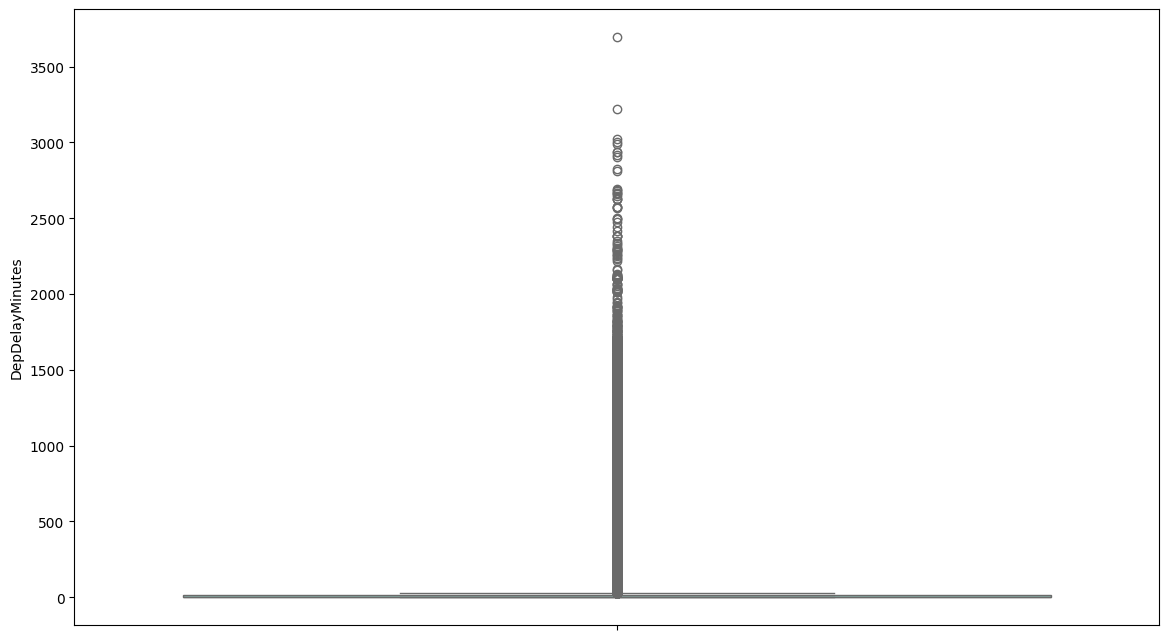

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df['DepDelayMinutes'], palette="Set3")

In [64]:
df[(df['DepDelayMinutes']>0)].count()

Time                      5895413
Origin                    5895413
Dest                      5895413
Carrier                   5895413
Cancelled                 5895413
CancellationReason        5895413
Delayed                   5895413
DepDelayMinutes           5895413
CarrierDelay              5895413
Weather_Delay_Length      5895413
NASDelay                  5895413
SecurityDelay             5895413
LateAircraftDelay         5895413
Temperature               5895413
Feels_Like_Temperature    5895413
Altimeter_Pressure        5895413
Sea_Level_Pressure        5895413
Visibility                5895413
Wind_Speed                5895413
Wind_Gust                 5895413
Precipitation             5895413
Ice_Accretion_3hr         5895413
dtype: int64

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/4057183575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Temperature'], palette="Set3")


<Axes: ylabel='Temperature'>

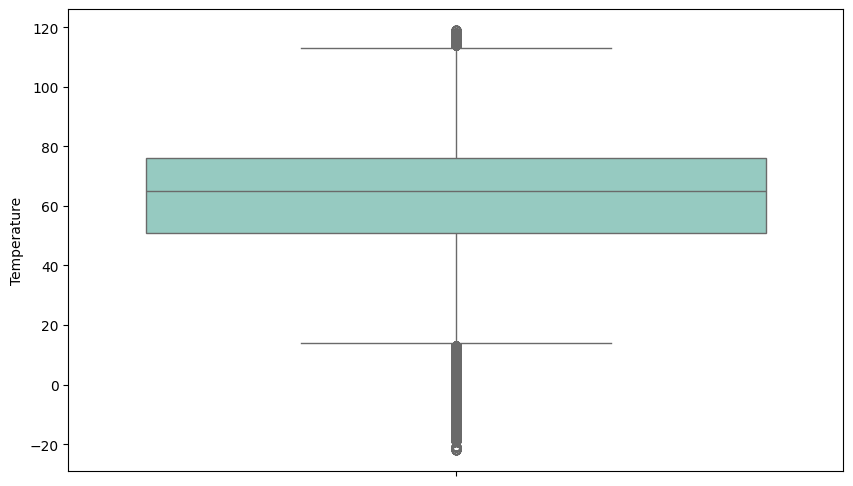

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Temperature'], palette="Set3")

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/1002605207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Altimeter_Pressure'], palette="Set3")


<Axes: ylabel='Altimeter_Pressure'>

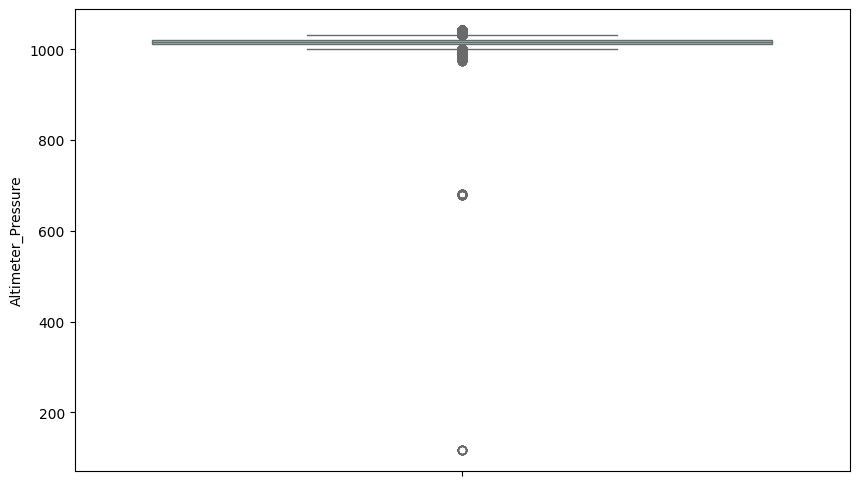

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Altimeter_Pressure'], palette="Set3")

In [44]:
df['Altimeter_Pressure'].describe()

count    1.514451e+07
mean     1.016327e+03
std      6.502375e+00
min      1.164900e+02
25%      1.012530e+03
50%      1.016260e+03
75%      1.020320e+03
max      1.042330e+03
Name: Altimeter_Pressure, dtype: float64

In [49]:
len(df[(df['Altimeter_Pressure']<800)])

40

In [50]:
df = df[(df['Altimeter_Pressure']>800)].reset_index(drop=True)

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/1427634310.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Altimeter_Pressure'], palette="Set3")


<Axes: ylabel='Altimeter_Pressure'>

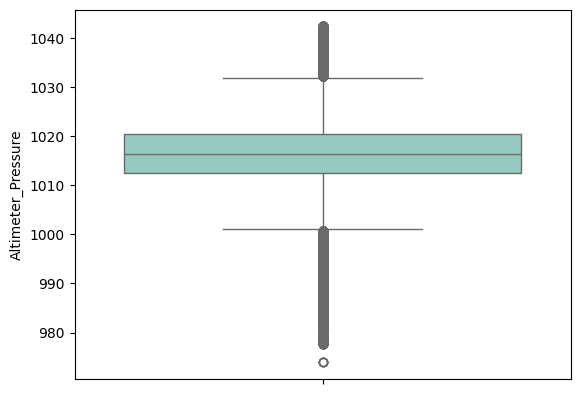

In [51]:
sns.boxplot(data=df['Altimeter_Pressure'], palette="Set3")

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/403237622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Sea_Level_Pressure'], palette="Set3")


<Axes: ylabel='Sea_Level_Pressure'>

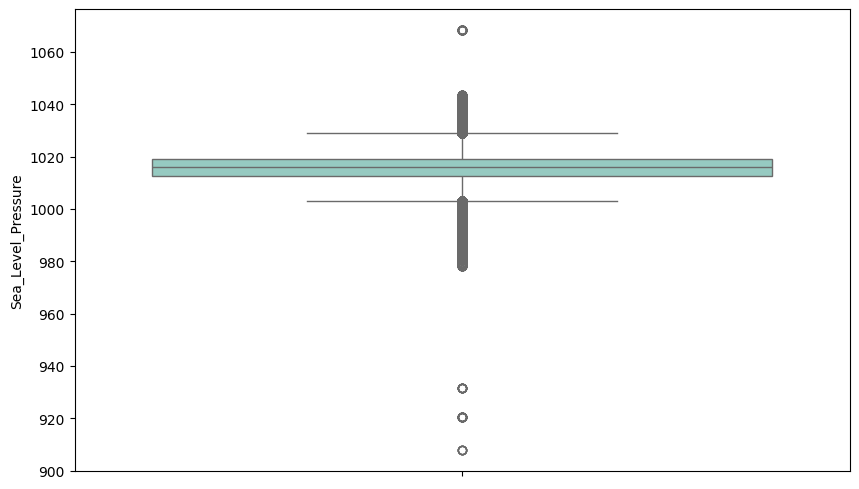

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Sea_Level_Pressure'], palette="Set3")

In [52]:
df['Sea_Level_Pressure'].describe()

count    1.514447e+07
mean     1.016158e+03
std      6.171481e+00
min      9.078000e+02
25%      1.012800e+03
50%      1.016200e+03
75%      1.019300e+03
max      1.068400e+03
Name: Sea_Level_Pressure, dtype: float64

In [53]:
len(df[(df['Sea_Level_Pressure']<940)])

5

In [54]:
df = df[(df['Sea_Level_Pressure']>940)].reset_index(drop=True)

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/1567403905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Visibility'], palette="Set3")


<Axes: ylabel='Visibility'>

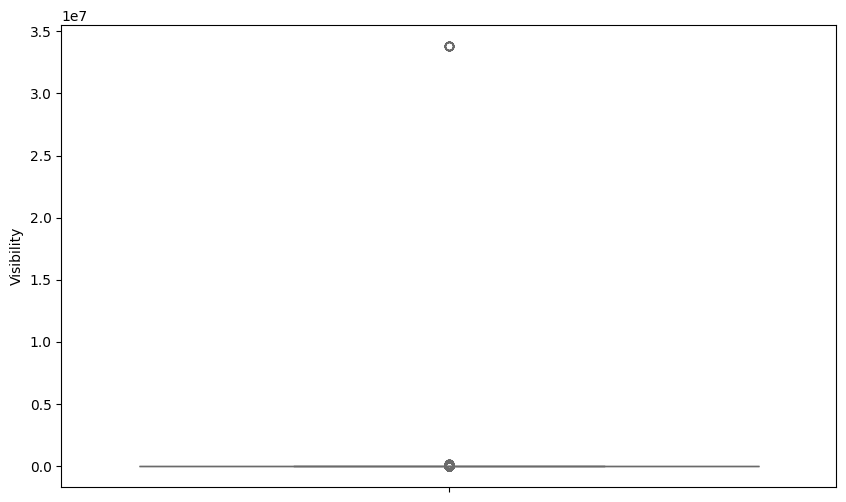

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Visibility'], palette="Set3")

In [56]:
len(df[(df['Visibility']<3.0)])

3093

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/2151332524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Wind_Speed'], palette="Set3")


<Axes: ylabel='Wind_Speed'>

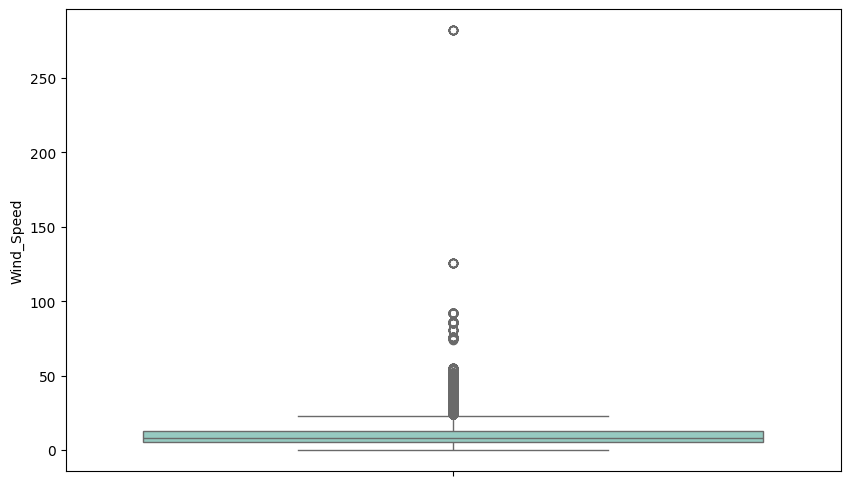

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Wind_Speed'], palette="Set3")

In [57]:
df['Wind_Speed'].describe()

count    1.514447e+07
mean     9.068772e+00
std      5.421865e+00
min      0.000000e+00
25%      5.750000e+00
50%      8.060000e+00
75%      1.266000e+01
max      2.819400e+02
Name: Wind_Speed, dtype: float64

In [58]:
len(df[(df['Wind_Speed']>100)])

22

<Axes: xlabel='Wind_Speed', ylabel='Count'>

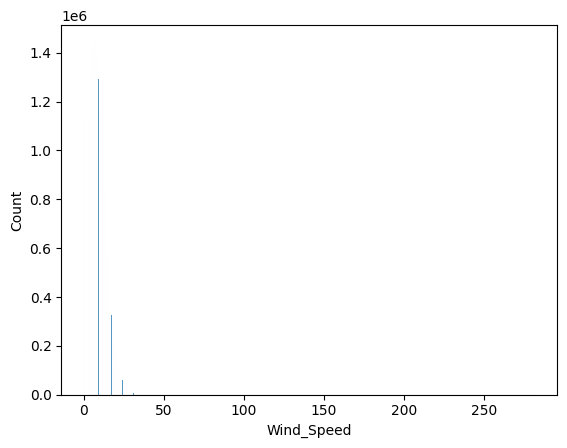

In [59]:
sns.histplot(df['Wind_Speed'])

In [60]:
df = df[(df['Wind_Speed']<100)].reset_index(drop=True)

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/812265657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Wind_Gust'], palette="Set3")


<Axes: ylabel='Wind_Gust'>

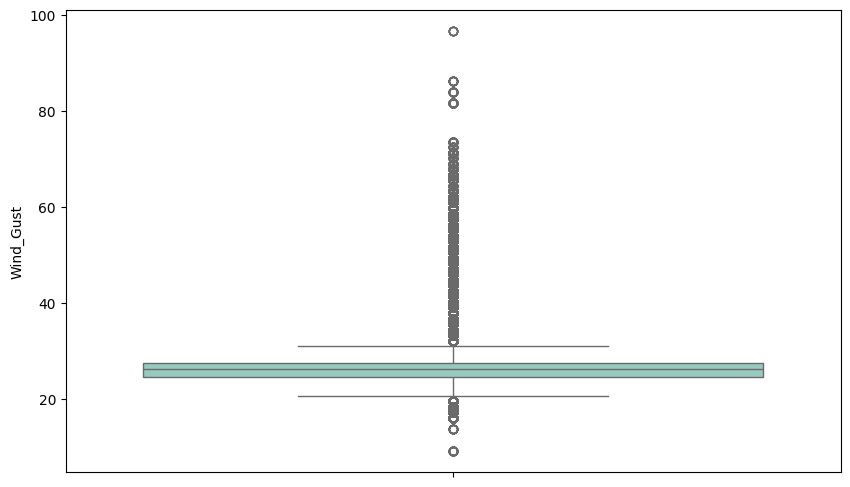

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Wind_Gust'], palette="Set3")

In [62]:
df['Wind_Gust'].describe()

count    1.514445e+07
mean     2.608713e+01
std      3.098732e+00
min      9.210000e+00
25%      2.474000e+01
50%      2.624000e+01
75%      2.762000e+01
max      9.667000e+01
Name: Wind_Gust, dtype: float64

In [63]:
len(df[(df['Wind_Gust']>80)])

129

In [66]:
df = df[(df['Wind_Gust']<80)].reset_index(drop=True)

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/4000517995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Precipitation'], palette="Set3")


<Axes: ylabel='Precipitation'>

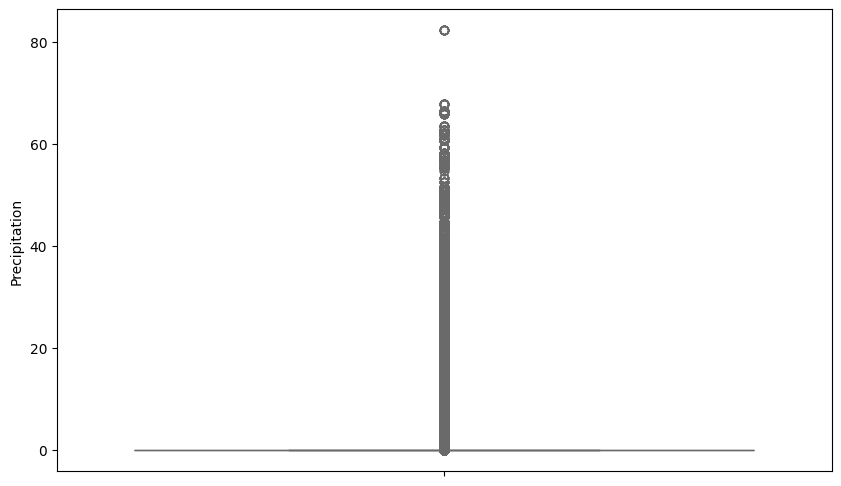

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Precipitation'], palette="Set3")

In [70]:
df['Precipitation'].describe()

count    1.514432e+07
mean     1.739696e-01
std      1.295223e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.230000e+01
Name: Precipitation, dtype: float64

In [68]:
len(df[(df['Precipitation']>80)])

12

In [71]:
df = df[(df['Precipitation']<80)].reset_index(drop=True)

/var/folders/ys/snx2hvcx76d5p1xgd394mtlc0000gn/T/ipykernel_2563/707499276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Ice_Accretion_3hr'], palette="Set3")


<Axes: ylabel='Ice_Accretion_3hr'>

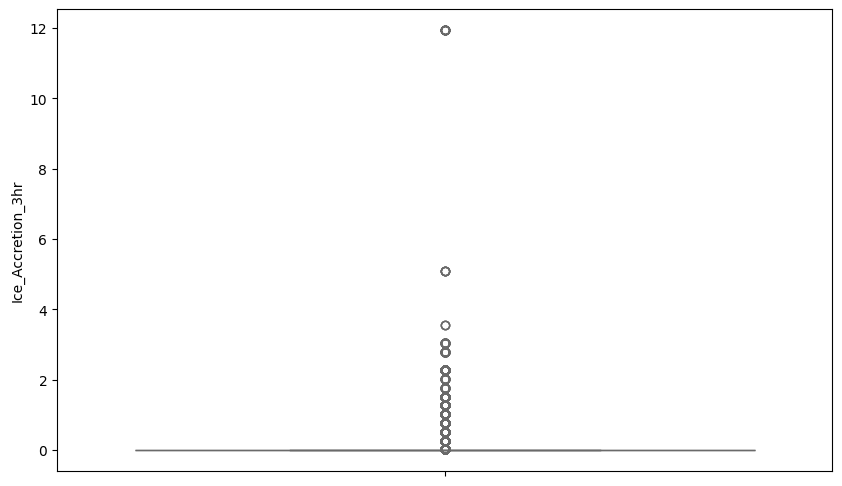

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Ice_Accretion_3hr'], palette="Set3")

In [72]:
len(df[(df['Ice_Accretion_3hr']>6)])

22

In [73]:
df = df[(df['Ice_Accretion_3hr']<6)].reset_index(drop=True)

#### Changing Time column to datetime format and splitting to Day, Month, Year and Time columns

In [76]:
df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S")

In [77]:
df['Day_of_Week'] = df['Time'].dt.dayofweek
df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year             
df['Time_of_Day'] = df['Time'].dt.time

QA check to see if format used was correct and columns created

In [81]:
df['Day_of_Week'].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int32)

In [79]:
df['Month'].unique()

array([ 1,  2, 10, 11, 12,  3,  4,  5,  6,  7,  8,  9], dtype=int32)

In [80]:
df.columns

Index(['Time', 'Origin', 'Dest', 'Carrier', 'Cancelled', 'CancellationReason',
       'Delayed', 'DepDelayMinutes', 'CarrierDelay', 'Weather_Delay_Length',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr', 'Day_of_Week', 'Month', 'Year', 'Time_of_Day'],
      dtype='object')

#### Create the column for prediction goal (y_pred)

In [82]:
df['Weather_Delay_Length'].describe()

count    1.514428e+07
mean     1.172161e+00
std      1.632981e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.805000e+03
Name: Weather_Delay_Length, dtype: float64

In [83]:
df['Weather_Delayed'] = df['Weather_Delay_Length'] > 0

In [84]:
df['Weather_Delayed'].describe()

count     15144284
unique           2
top          False
freq      14869339
Name: Weather_Delayed, dtype: object

In [85]:
preprocessed_df = df

In [88]:
preprocessed_df.columns

Index(['Time', 'Origin', 'Dest', 'Carrier', 'Cancelled', 'CancellationReason',
       'Delayed', 'DepDelayMinutes', 'CarrierDelay', 'Weather_Delay_Length',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr', 'Day_of_Week', 'Month', 'Year', 'Time_of_Day',
       'Weather_Delayed'],
      dtype='object')

### Train and Test Split

The dataset will be split into train and test sections *before* Scaling and Balancing, due to the imbalanced nature of our dataset.

Define X and y

In [95]:
X = preprocessed_df.drop(columns = ['Delayed', 'DepDelayMinutes', 'Weather_Delayed', 'Weather_Delay_Length'])

In [96]:
X.columns

Index(['Time', 'Origin', 'Dest', 'Carrier', 'Cancelled', 'CancellationReason',
       'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Temperature', 'Feels_Like_Temperature', 'Altimeter_Pressure',
       'Sea_Level_Pressure', 'Visibility', 'Wind_Speed', 'Wind_Gust',
       'Precipitation', 'Ice_Accretion_3hr', 'Day_of_Week', 'Month', 'Year',
       'Time_of_Day'],
      dtype='object')

In [90]:
y = preprocessed_df['Weather_Delayed']

Split the dataset while maintaining the class distribution

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Verify the distribution

In [94]:
print("Original dataset class distribution:")
print(pd.Series(y).value_counts(normalize=True))

print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Original dataset class distribution:
Weather_Delayed
False    0.981845
True     0.018155
Name: proportion, dtype: float64

Training set class distribution:
Weather_Delayed
False    0.981845
True     0.018155
Name: proportion, dtype: float64

Test set class distribution:
Weather_Delayed
False    0.981845
True     0.018155
Name: proportion, dtype: float64


### Scaling

### Balancing